In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#uploading the csv file in an array
df = pd.read_csv('./iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])

#getting the first 3 rows of the data set
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
df['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df['label'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: label, dtype: int64

## Label converion to binary-valued

In [17]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

## extract sepal length and petal length

In [21]:
X = df.iloc[0:100, [0, 2]].values
X=np.array(X)
print(X)
print(X.shape)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1,stratify=y) #IID Rule

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Fit k-Nearest Neighbor Model:

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## Use kNN Model to Make Predictions

In [24]:
y_pred = knn_model.predict(X_test)

## Evaluate the model accuracy 

In [25]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

Accuracy: 1.00
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Tune hyperparameters

In [35]:
neighbors = np.arange(1,15)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    print (i,k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
print( train_accuracy)
print( test_accuracy)

0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Generate plot

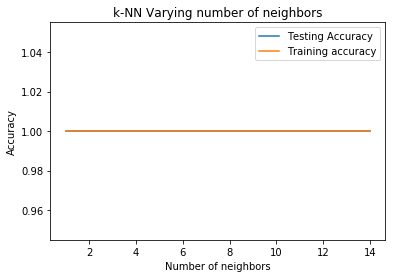

In [36]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Use Pipeline to combine transformers and estimators

In [37]:
from sklearn.pipeline import Pipeline
pipe_knn=Pipeline([('scl2',StandardScaler()),('clf2',KNeighborsClassifier(n_neighbors=3))])
knn_train=pipe_knn.fit(X_train, y_train)
knn_test=pipe_knn.fit(X_test, y_test)
print('Test Accuracy: %.3f' % pipe_knn.score(X_test, y_test))
y_pred_knn_test=pipe_knn.predict(X_test)
cm3 = confusion_matrix(y_test, y_pred_knn_test)
print(cm3)
print(classification_report(y_test,y_pred_knn_test))

Test Accuracy: 1.000
[[15  0]
 [ 0 15]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Use k-Fold cross-validation for model selection 

In [44]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=10)
model_kfold = linear_model.SGDClassifier(max_iter=100, tol=1e-4)
results_kfold = model_selection.cross_val_score(model_kfold, X_train,
y_train, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 100.00%


## Fine Tune kNN model via GridSearch

In [50]:
from sklearn.model_selection import GridSearchCV
param_range=np.arange(1,15)
param_grid = [{'clf2__n_neighbors': param_range}]
gd_knn=GridSearchCV(estimator=pipe_knn, param_grid=param_grid,
cv=10, n_jobs=-1)
gd_knn.fit(X_train, y_train)
print(gd_knn.best_score_)
print(gd_knn.best_params_)

1.0
{'clf2__n_neighbors': 1}


## Fit Adaline model via SGDClassifier

In [51]:
pipe_lc=Pipeline([('scl1',StandardScaler()),('clf1',
linear_model.SGDClassifier(max_iter=10, tol=1e-2, loss='perceptron'))])
lc_train=pipe_lc.fit(X_train, y_train)
lc_test=pipe_lc.fit(X_test, y_test)
print('Test Accuracy: %.3f' % pipe_lc.score(X_test, y_test))
y_pred_test=pipe_lc.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred_test)
print(cm2)

Test Accuracy: 1.000
[[15  0]
 [ 0 15]]


## Fine Tune SGDClassifier via GridSearch

In [52]:
param1_range=[0.00001, 0.0001, 0.001, 0.01, 1.0, 10.0]
param2_range=[5, 10, 15, 20, 25, 30, 40, 50, 60, 100]
param_grid = [{'clf1__max_iter': param2_range, 'clf1__tol':param1_range}]
gd=GridSearchCV(estimator=pipe_lc, param_grid=param_grid, cv=10,n_jobs=-1)
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

1.0
{'clf1__max_iter': 5, 'clf1__tol': 1e-05}


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Select the suitable algorithm with nested cross validation

In [53]:
from sklearn.model_selection import cross_val_score
scores_GD=cross_val_score(gd, X_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_GD),
np.std(scores_GD)))
scores_KNN=cross_val_score(gd, X_train, y_train, scoring='accuracy', cv=2)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_KNN),
np.std(scores_KNN)))

C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reach

CV accuracy: 0.972 +/- 0.028


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


CV accuracy: 1.000 +/- 0.000


C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\thinkpad\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


## Fit the selected model and get the accuracy test

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)
y_pred_knn1 = knn.predict(X_test)
print('Test Accuracy: %.3f' % knn1.score(X_test, y_test))
print(confusion_matrix(y_test,y_pred_knn1))
print(classification_report(y_test,y_pred_knn1))